In [2]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## 9.2 pandas에서 seaborn으로 그래프 그리기

* matplotlib = 저수준의 라이브러리
* 데이터를 어떻게 보여줄 것인지부터(선그래프, 막대그래프, 산포도 등) 범례와 제목, 눈금 라벨, 주석 같은 기본 컴포넌트로 그래프를 작성해야 함


* pandas를 사용하다 보면 로우와 컬럼 라벨을 가진 다양한 컬럼의 데이터를 다루게 됨<br>
    => pandas는 Series와 DataFrame 객체를 간단하게 시각화할 수 있는 내장 메서드 제공<br>
    => 다른 라이브러리 : seaborn (흔히 사용하는 다양한 시각화 패턴을 쉽게 구현할 수 있도록 도와줌, matplotlib의 기본 컬러 스킴과 플롯 스타일을 변경함)

### 9.2.1 Line Plots (선그래프)

* Series와 DataFrame은 둘 다 plot 메서드를 이용해 다양한 형태의 그래프를 생성할 수 있음
* 기본적으로 plot 메서드는 `선그래프`를 생성함

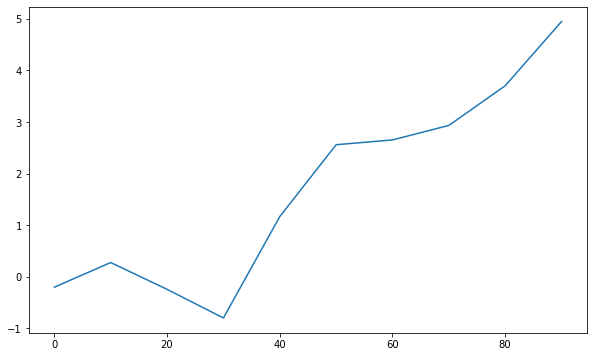

In [3]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

* Series 객체의 색인은 matplotlib에서 그래프를 생성할 때 x축으로 해석됨<br>
    * use_index=False옵션을 넘겨서 색인을 그래프의 축으로 사용하는 것을 막을 수 있다.
    * x축의 눈금과 한계 => xticks, xlim 옵션으로 조절
    * y축도 => yticks, ylim 옵션으로 조절가능
    * p.368 표 9-3에서 사용 가능한 plot 메서드의 옵션을 확인할 수 있다.

#### use_index=False옵션을 넘겨서 색인을 그래프의 축으로 사용하는 것을 막기

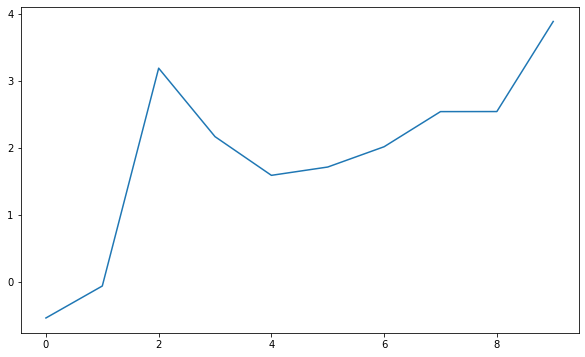

In [6]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot(use_index=False)

#### xlim, xthicks 

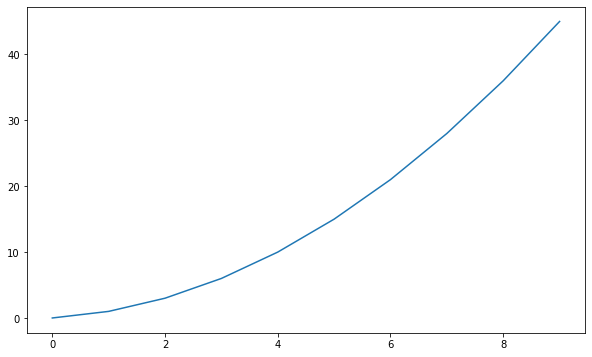

In [38]:
s = pd.Series(np.arange(10).cumsum(), index=np.arange(0, 10, 1))
s.plot()

In [39]:
s

0     0
1     1
2     3
3     6
4    10
5    15
6    21
7    28
8    36
9    45
dtype: int32

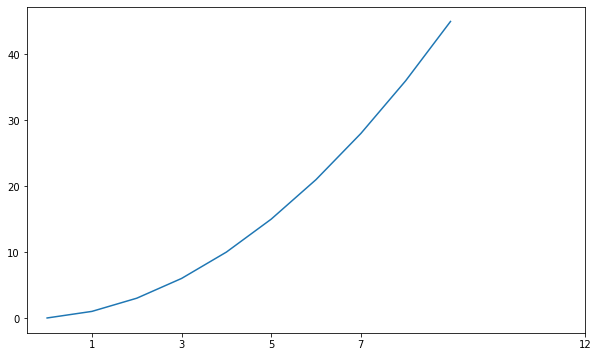

In [41]:
s = pd.Series(np.arange(10).cumsum(), index=np.arange(0, 10, 1))
s.plot(xticks=[1,3,5,7,12])

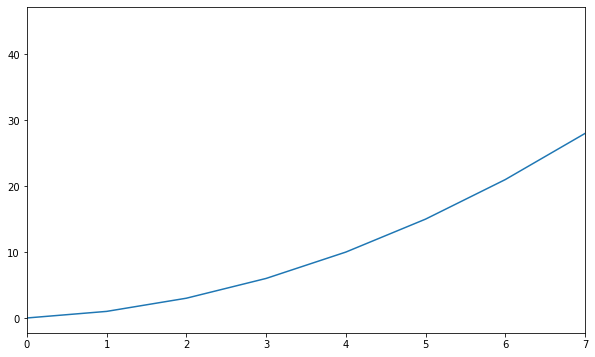

In [51]:
s = pd.Series(np.arange(10).cumsum(), index=np.arange(0, 10, 1))
s.plot(xlim=[0,7])

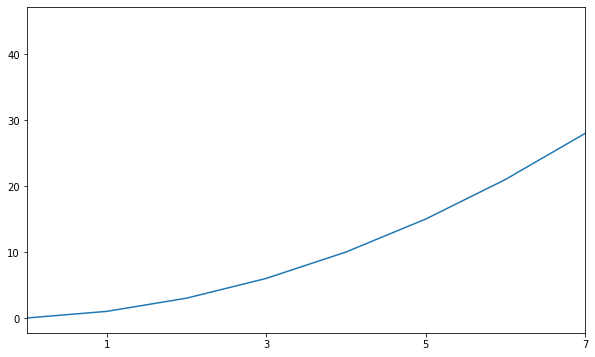

In [50]:
s = pd.Series(np.arange(10).cumsum(), index=np.arange(0, 10, 1))
s.plot(xticks=[1,3,5,7,12],xlim=[0,7])

* DataFrame의 plot 메서드는 하나의 서브플롯 안에 각 컬럼별로 선그래프를 그리고 자동적으로 범례를 생성함

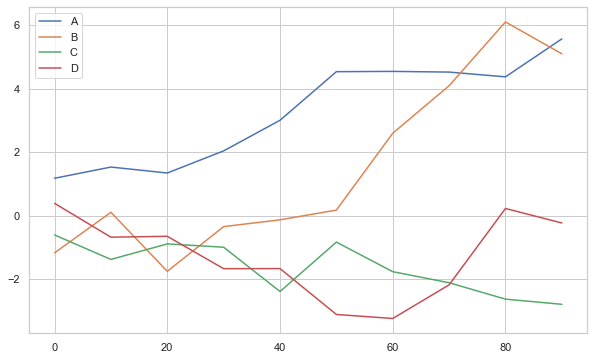

In [119]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

* plot 속성에는 다양한 종류의 그래프 패밀리가 존재한다. 예를 들어 df.plot()은 df.plot.line()과 동일하다. 이런 메서드에 대해서는 잠시 뒤에 알아보자
<br>
* DataFrame에는 컬럼을 쉽게 다루기 위한 몇 가지 옵션이 존재.<br>
예) 모든 컬럼을 같은 서브플롯에 그릴 것인지 아니면 각각의 서브플롯을 따로 만들 것인지 지정할 수 있음 (p.368 표 9-4 참고)

<표 9-4> <br>

|인자|설명|
|:---:|:---:|
|subplots|각 DataFrame의 컬럼을 독립된 서브플롯에 그린다 => True로 하면 각각의 서브플롯을 따로 만든다.|
|sharex|subplots=True인 경우 같은 x축을 공유하고 눈금과 한계를 연결한다.|
|sharey|subplots=True인 경우 같은 y축을 공유한다.|
|figsize|생성될 그래프의 크기를 튜플로 지정한다.|
|title|그래프의 제목을 문자열로 지정한다.|
|legend|서브플롯의 범례를 추가한다.(기본값은 True)|
|sort_columns|컬럼을 알파벳 순서로 그린다. 기본값은 존재하는 컬럼 순서|

### 9.2.2 Bar Plots (막대그래프)

* plot.bar() : 수직막대그래프
* plot.barh() : 수평막대그래프
* Series 또는 DataFrame의 색인은 수직막대그래프(bar)인 경우 x 눈금, 수평막대그래프(barh)인 경우 y 눈금으로 사용됨

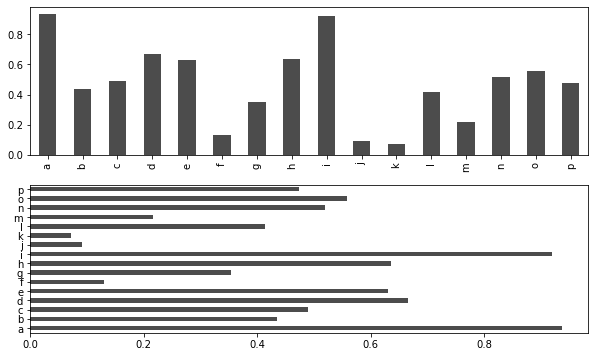

In [55]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

* color='k' 옵션과 alpha=0.7 옵션은 그래프를 검은색으로 그리고 투명도를 지정한 것

#### 막대그래프를 그릴 때 유용한 방법
* Series의 value_counts 메서드를 이용해서 값의 빈도를 그리는 것이다. =>  s.value_counts().plot.bar()

In [58]:
data = pd.read_csv("air_reserve.csv")
data.head(3)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6


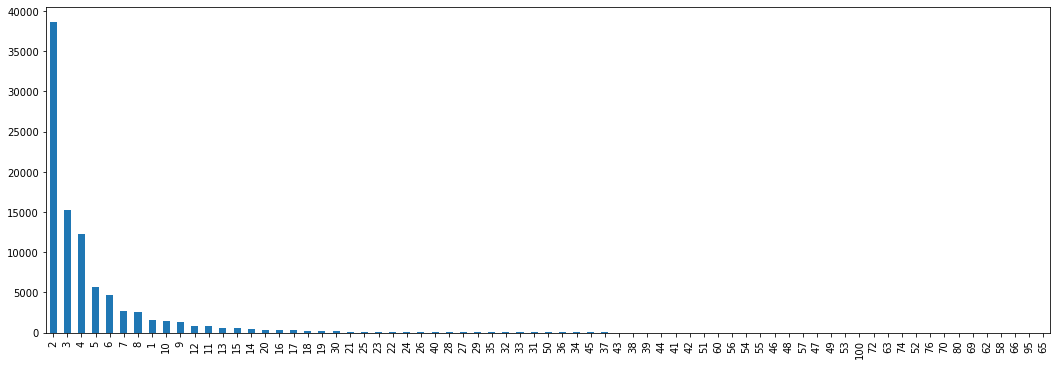

In [63]:
f, ax = plt.subplots(figsize=(18, 6))
data['reserve_visitors'].value_counts().plot.bar()

* DataFrame에서 막대그래프는 각 로우의 값을 함께 묶어서 하나의 그룹마다 각각의 막대를 보여줌

In [64]:
np.random.seed(12348)

In [66]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.355275,0.513329,0.306168,0.945081
two,0.932493,0.520682,0.402644,0.587002
three,0.333642,0.879628,0.852004,0.620666
four,0.464247,0.846397,0.442342,0.189303
five,0.643572,0.600775,0.427939,0.939054
six,0.505451,0.462759,0.839412,0.350779


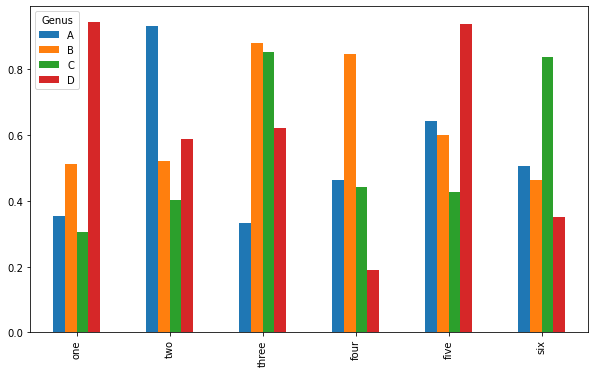

In [67]:
df.plot.bar()

* DataFrame의 컬럼인 'Genus'가 범례의 제목으로 사용되었음

#### 누적막대그래프
* stacked=True 옵션을 사용
* 각 로우의 값들이 하나의 막대에 누적되어 출력됨

In [68]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

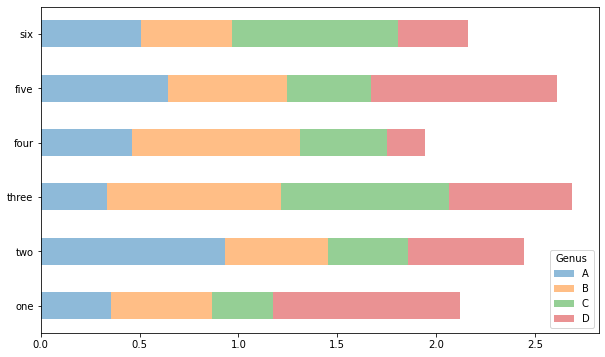

In [69]:
df.plot.barh(stacked=True, alpha=0.5)

In [70]:
plt.close('all')

#### 팁 데이터
* 요일별 파티숫자를 뽑고 파티 숫자 대비 팁비율을 보여주는 막대그래프를 그려보자

In [71]:
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size']) # 요일과 파티 숫자에 따라 교차 테이블을 생성함
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [79]:
# 1인과 6인 파티는 제외
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [78]:
party_counts.sum(0)

size
2    156
3     38
4     37
5      5
dtype: int64

In [77]:
party_counts.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [74]:
# 각 로우의 합이 1이 되도록 정규화
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


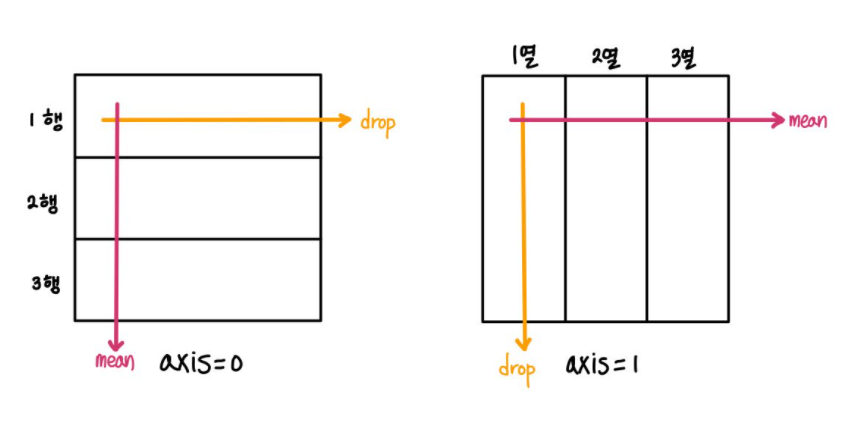

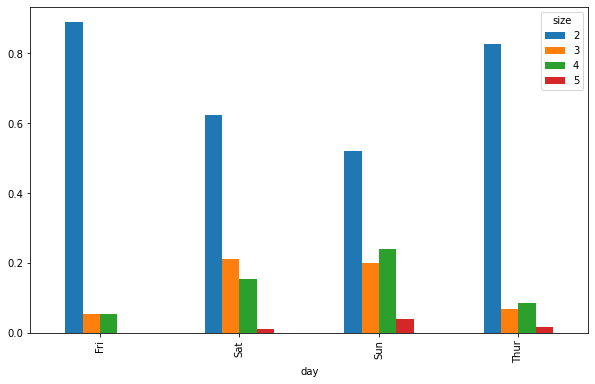

In [82]:
party_pcts.plot.bar() # 요일별 파티 규모

* 파티의 규모는 주말에 커지는 경향이 있음을 알 수 있다.

In [83]:
plt.close('all')

####  seaborn 패키지로 팁 데이터를 다시 그려보자
* 그래프를 그리기 전에 요약해야 하는 데이터는 seaborn 패키지를 이용하면 훨씬 간단하게 처리할 수 있다.

In [84]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


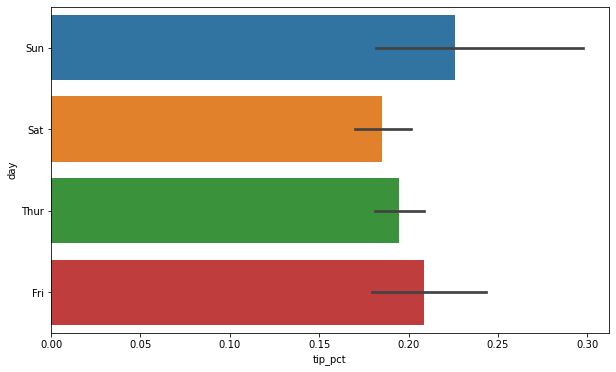

In [85]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h') # 에러막대를 포함한 요일별 팁 비율 그래프

* 수평으로 그리려면 x, y축을 바꾸고 orient 옵션에 'h'를 넘기면 된다.
* seaborn 플로팅 함수의 data 인자는 pandas의 DataFrame을 받는다. 다른 인자들은 컬럼 이름을 참조한다. <br>


* day 컬럼의 각 값에 대한 데이터는 여럿 존재하므로 tip_pct의 평균값으로 막대그래프를 그림.
    * 대부분의 경우 데이터의 평균을 보려고 하겠지만 때로는 다른 것들을 보고 싶을 수도 있다. 
    * 예를 들면 
        + 데이터에 극단치가 많은 경우 중앙값을 그리는 게 좋을 수 있다.
        + 데이터가 범주형인 경우  각 카테고리가 몇 번 표시되는지 계산할 수 있다.
* 이때 `estimator` 를 지정하면 됨 => [seaborn 그래프 설명 블로그 참고](http://hleecaster.com/python-seaborn-barplot/)

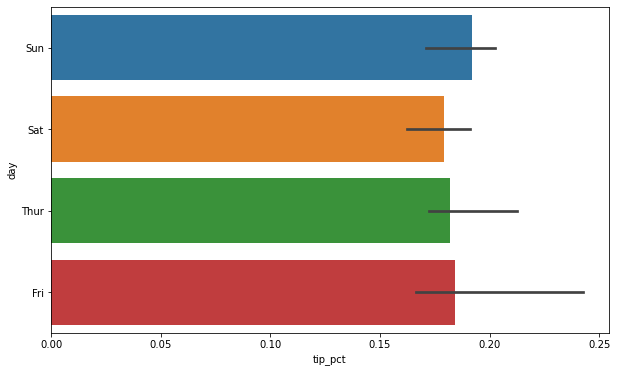

In [86]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h',estimator=np.median)

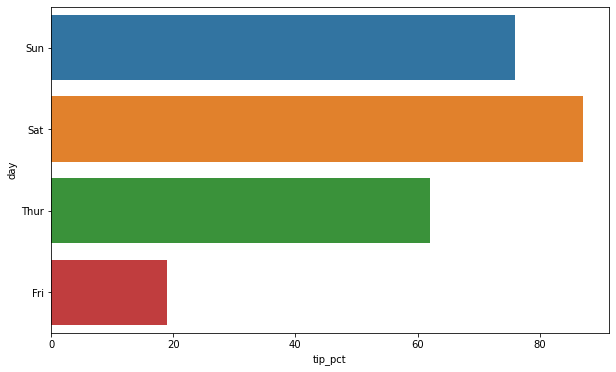

In [89]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h',estimator=len)

* 막대그래프 위에 덧그려진 검은 선은 95%의 신뢰구간을 나타낸다 (이 값은 옵션으로 설정 가능)

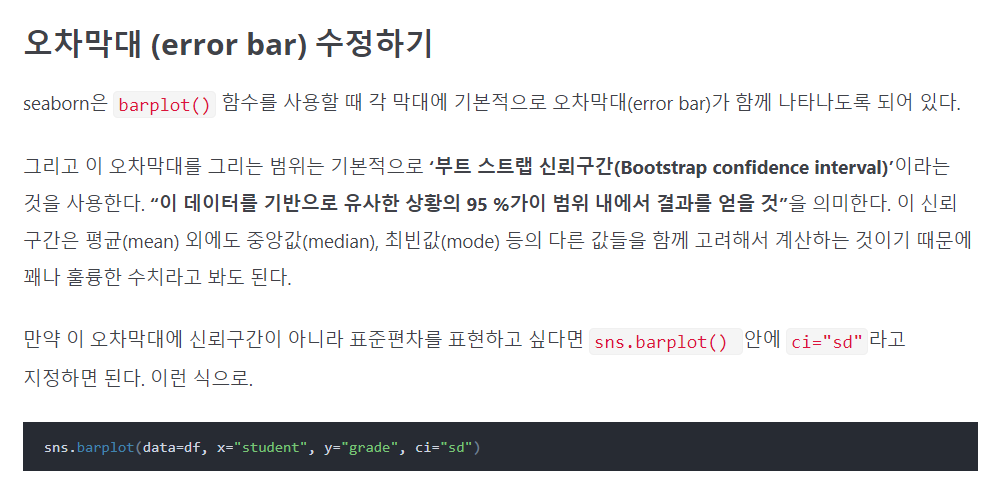

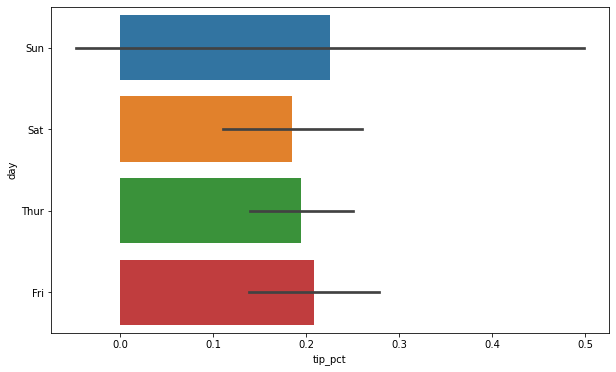

In [91]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h',ci="sd") 

In [92]:
plt.close('all')

#### seaborn.barplot 메서드의 hue 옵션을 이용하면 추가 분류에 따라 나눠 그릴 수 있다

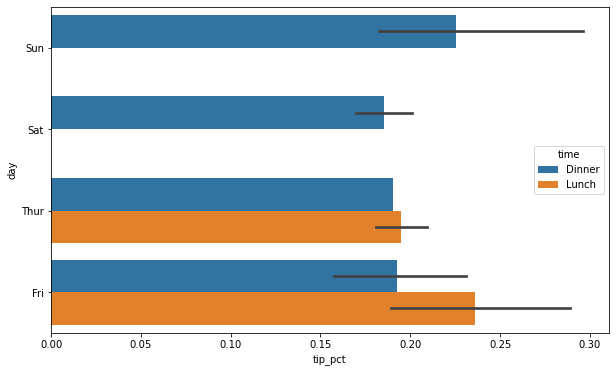

In [93]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

#### seaborn 라이브러리는 자동으로 기본 색깔 팔레트, 그래프 배경, 그리드 선 색상 같은 꾸밈새를 변경한다.
* seaborn.set 메서드를 이용해서 이런 꾸밈새를 변경 가능

In [94]:
sns.set(style="whitegrid")

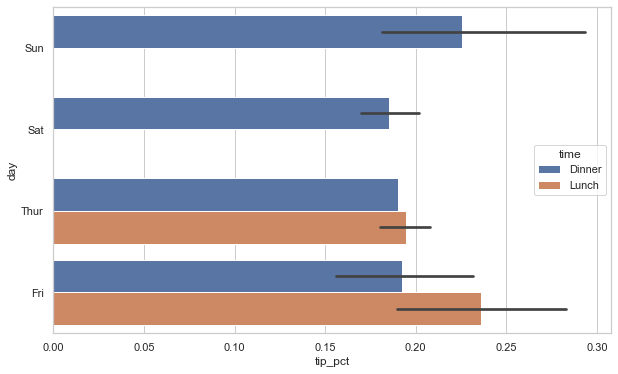

In [95]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### 9.2.3 Histograms and Density Plots (히스토그램과 밀도 그래프)

#### 히스토그램

* 히스토그램은 막대그래프의 한 종류로, 값들의 빈도를 분리해서 보여줌
* 데이터 포인트는 분리되어 고른 간격의 막대로 표현되며 데이터의 숫자가 막대의 높이로 표현됨
* 팁 데이터를 사용해서 전제 결제금액 대비 팁 비율을 Series의 plot.hist 메서드를 사용해서 만들어보자

In [96]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

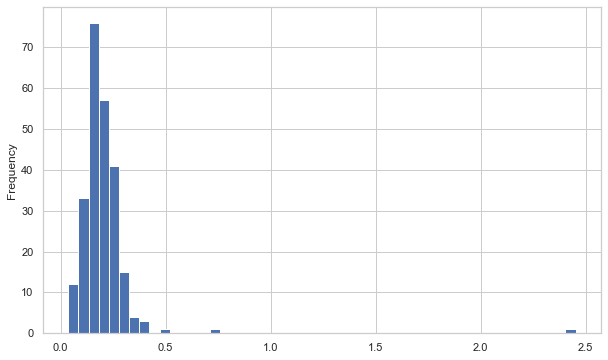

In [97]:
tips['tip_pct'].plot.hist(bins=50) # 팁 비율 히스토그램

#### 밀도 그래프

* 관찰값을 사용해서 추정되는 연속된 확률 분포를 그린다.
* 일반적인 과정은 kernel 메서드를 잘 섞어서 이 분포를 근사하는 방법인데 이보다 단순한 정규 분포다.
* 그래서 밀도 그래프는 **KDE**(Kernel Density Estimate : 커넬 밀도 추정) 그래프라고도 알려져 있다.
* plot.kde을 이용해서 밀도 그래프를 표준 KDE 형식으로 생성한다.

In [98]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

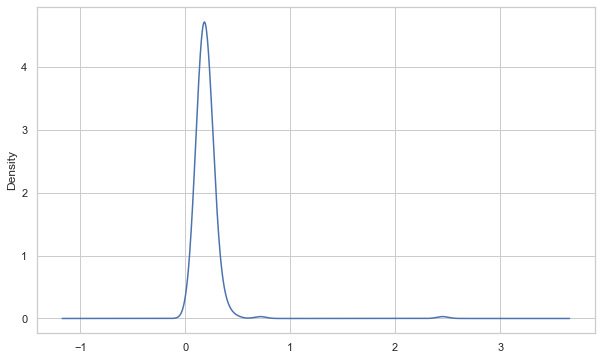

In [99]:
tips['tip_pct'].plot.density() # 팁 비율에 대한 밀도 그래프

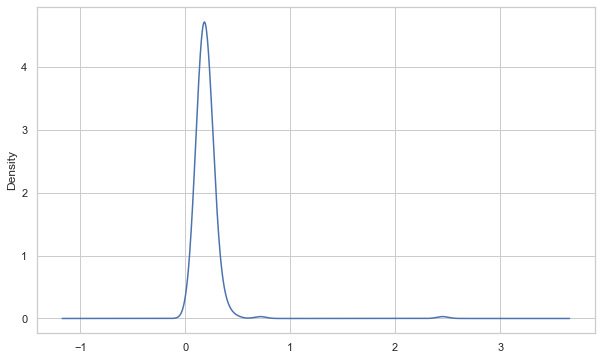

In [100]:
tips['tip_pct'].plot.kde()

### distplot

* 히스토그램과 밀도 그래프를 한 번에 손쉽게 그릴 수 있다
* 예) 두개의 다른 표준정규분포로 이루어진 양봉분포를 그려보자

In [101]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

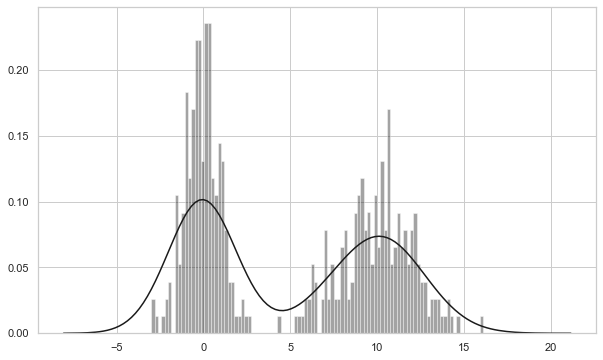

In [102]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

* bins : 막대 개수
* binwidth : 막대그래프의 크기

### 9.2.4 Scatter or Point Plots (산포도)

* 두 개의 1차원 데이터 묶음 간의 관계를 나타내고자 할 때 유용한 그래프
* statsmodels 프로젝트에서 macrodata 데이터 묶음을 불러온 다음 몇 가지 변수를 선택하고 로그차를 구해보자

In [104]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
np.log(data)[-5:]

,cpi,m1,tbilrate,unemp
198,5.379386,7.296210,0.157004,1.791759
199,5.357407,7.362962,-2.120264,1.931521
200,5.359746,7.373249,-1.514128,2.091864
201,5.368165,7.410710,-1.714798,2.219203
202,5.377059,7.422912,-2.120264,2.261763


In [105]:
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


#### seaborn 라이브러리의 regplot 메서드를 이용해서 산포도와 선형회귀곡선을 함께 그릴 수 있다.

In [106]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

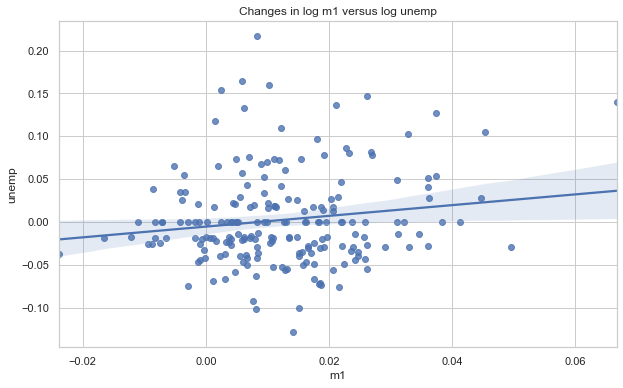

In [110]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp')) # 선형회귀곡선과 산포도

* 파란색 범위 = 잔차
* 잔차란? 통계학에서 실측치와 회귀 모형의 예측치 사이의 차이값 (오차의 범위) 
* ci=None 을 하면 잔차가 안 보이게 할 수 있다.
* fit_reg=False 을 하면 회귀선을 없앨 수 있다.
* line_kws={'color':"red"} : 회귀선의 색을 바꿀 수 있다.

### 짝지은 그래프 또는 산포도 행렬 (pairplot)

* 탐색 데이터 분석에서는 변수 그룹 간의 모든 산포도를 살펴보는 일이 매우 유용함.
* 이런 그래프를 직접 그리는 과정은 다소 복잡하기 때문에 seaborn의 pairplot 함수를 통해 대각선을 따라 각 변수에 대한 히스토그램이나 밀도 그래프도 생성 가능

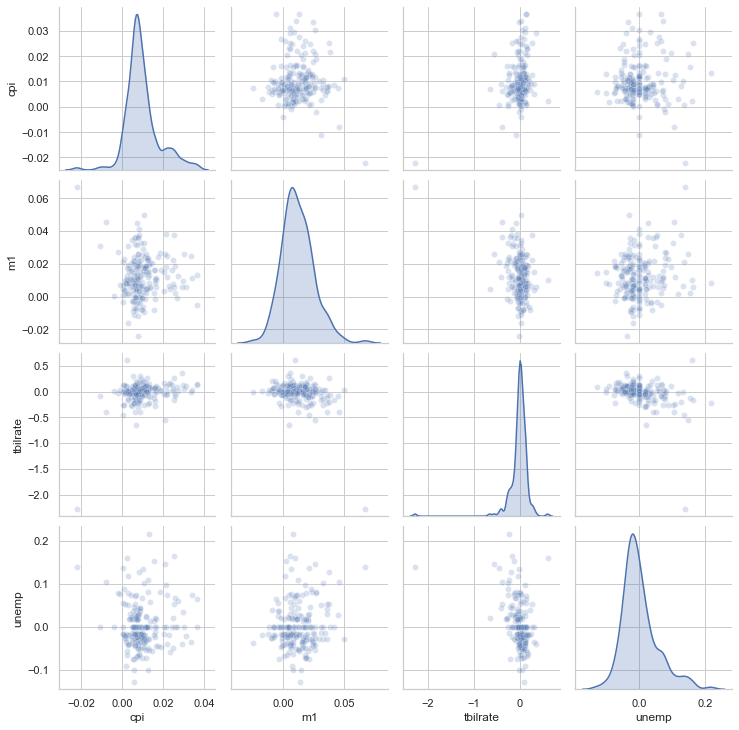

In [111]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2}) # 거시경제 데이터의 산포도 행렬

* plot_kws 인자는 각각의 그래프에 전달한 개별 설정값을 지정함
* 설정 옵션에 관한 자세한 내용은 seaborn.pairplot 문서 참고

### 9.2.5 Facet Grids and Categorical Data (패싯 그리드와 범주형 데이터)

* 추가적인 그룹 차원을 가지는 데이터는 어떻게 시각화할까?
* 다양한 범주형 값을 가지는 데이터를 시각화하는 한 가지 방법 = 패싯 그리드
* seaborn의 factorplot이라는 내장 함수를 통해 다양한 면을 나타내는 그래프를 쉽게 그릴 수 있다.

* Facet Grid란 쉽게 말해 Multi plot이라고 이해하면 된다! => 즉, 하나의 데이터를 여러 개의 plot으로 나눠서 보고자 할 때 사용됨

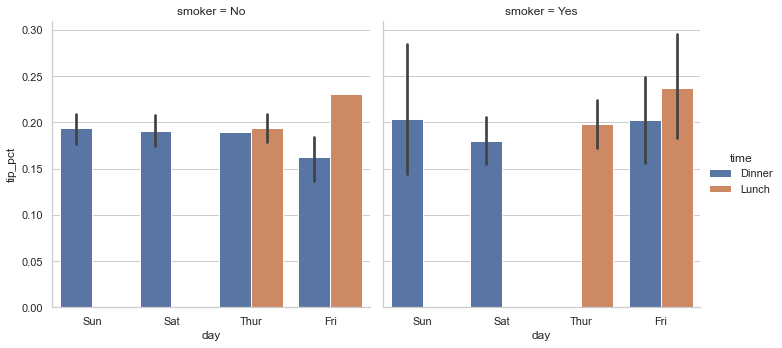

In [114]:
# 요일/시간/흡연 여부에 따른 팁 비율
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

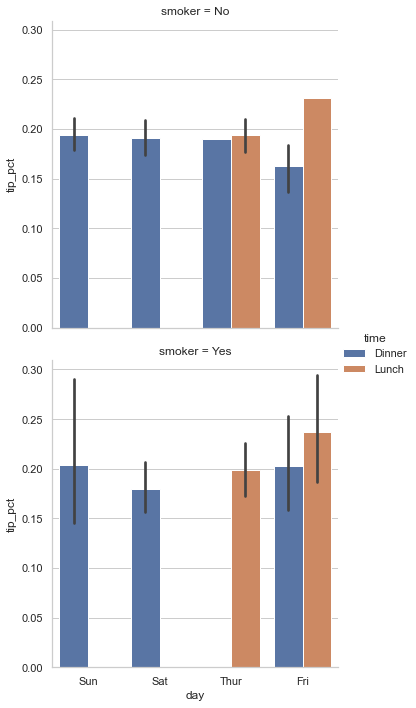

In [115]:
# 요일/시간/흡연 여부에 따른 팁 비율
sns.factorplot(x='day', y='tip_pct', hue='time', row='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

* 'time'으로 그룹을 만드는 대신 패싯 안에서 막대그래프의 색상을 달리해서 보여줄 수 있다.
* 또한 패싯 그리드에 time 값에 따른 그래프를 추가할 수도 있다.

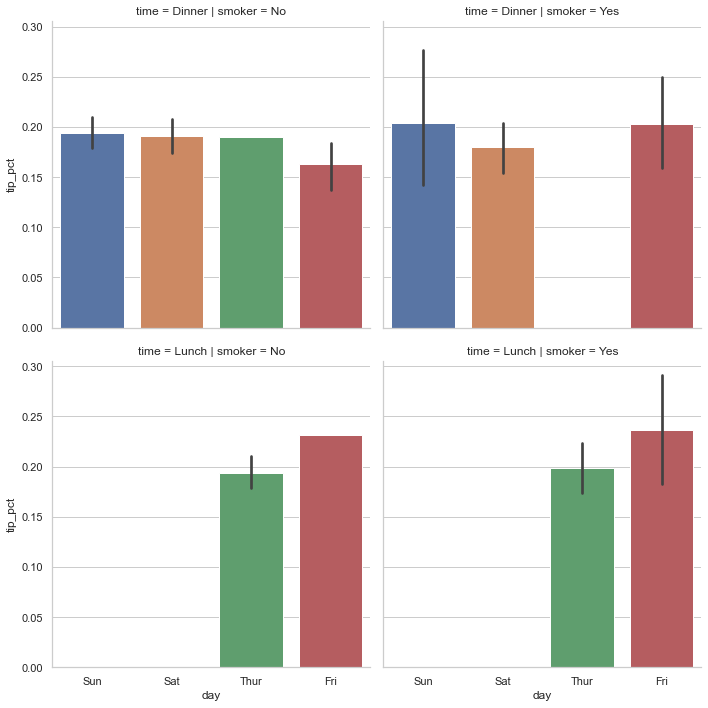

In [116]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

* factorplot은 보여주고자 하는 목적에 어울리는 다른 종류의 그래프도 함께 지원함
* 예) 중간값과 사분위 그리고 특잇값을 보여주는 상자그림(boxplot)이 효과적인 시각화 방법일 수도 있다.

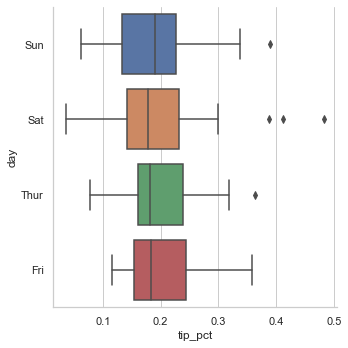

In [117]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

* 일반적인 용도의 seaborn.FacetGrid 클래스를 이용해서 나만의 패싯 그리드를 만들고 원하는 그래프를 그릴 수도 있다.
* 자세한 내용은 seaborn 문서를 참고

### seaborn 시각화방법 17가지 [블로그링크](https://dining-developer.tistory.com/30)

## 9.3 다른 파이썬 시각화 도구

* 여러 오픈소스와 마찬가지로 파이썬에서 그래프를 그릴 수 있는 라이브러리는 일일이 나열하기 힘들 정도로 많이 존재함
* 2010년 부터 웹을 위한 대화형 그래픽 도구 개발이 본격적으로 진행되었는데, Bokeh(보케)나 Plotly(플로틀리) 같은 도구를 이용하면 웹 브라우저 상에서 파이썬으로 동적 대화형 그래프를 그릴 수 있다. [보케](https://diplabs.tistory.com/11) [플로틀리](https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e)
* 웹이나 출판을 위한 정적 그래프를 생성한다면 matplotlib과 pandas, seaborn을 기본으로 사용하길 추천